Importing the Dependencies


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and analysis

In [4]:
#loading the dataset from csv to pandas dataset
advertising_data=pd.read_csv('/content/advertising.csv')

In [6]:
#first five rows of dataset
advertising_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
advertising_data.shape

(200, 4)

In [8]:
#getting some info abt the dataset
advertising_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Categorical features

In [10]:
#checking for any missing values
advertising_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Data Analysis

In [11]:
#statistical measures abt the data
advertising_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Numerical features

In [12]:
sns.set()

<ipython-input-20-4c446647313b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(advertising_data['TV'])


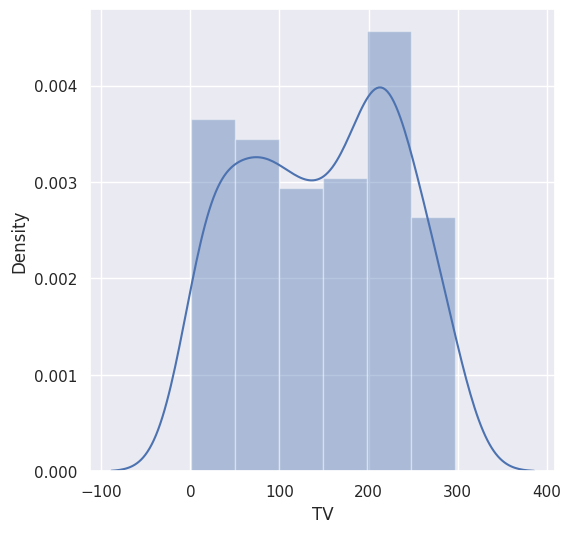

In [20]:
#TV distribution
plt.figure(figsize=(6,6))
sns.distplot(advertising_data['TV'])
plt.show()

<ipython-input-21-49e5eac39386>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(advertising_data['Radio'])


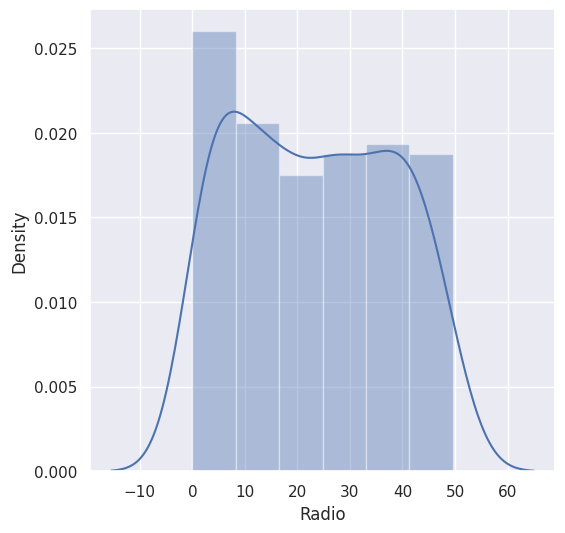

In [21]:
#Radio distribution
plt.figure(figsize=(6,6))
sns.distplot(advertising_data['Radio'])
plt.show()

<ipython-input-23-6e17bafec22a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(advertising_data['Newspaper'])


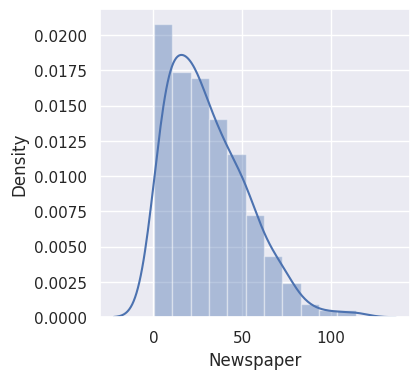

In [23]:
#Newspaper distribution
plt.figure(figsize=(4,4))
sns.distplot(advertising_data['Newspaper'])
plt.show()

<ipython-input-25-2fa63ee889aa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(advertising_data['Sales'])


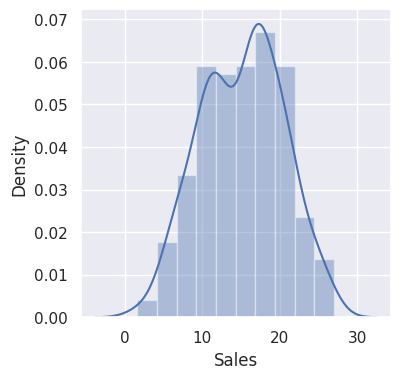

In [25]:
#Sales distribution
plt.figure(figsize=(4,4))
sns.distplot(advertising_data['Sales'])
plt.show()

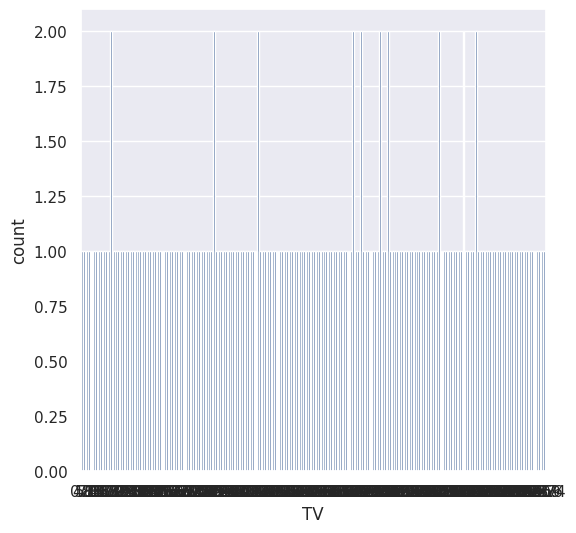

In [27]:
#TV
plt.figure(figsize=(6,6))
sns.countplot(x='TV',data=advertising_data)
plt.show()

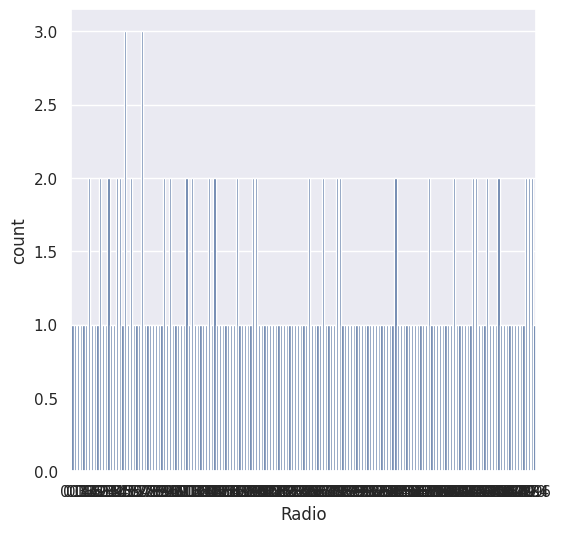

In [28]:
#Radio
plt.figure(figsize=(6,6))
sns.countplot(x='Radio',data=advertising_data)
plt.show()

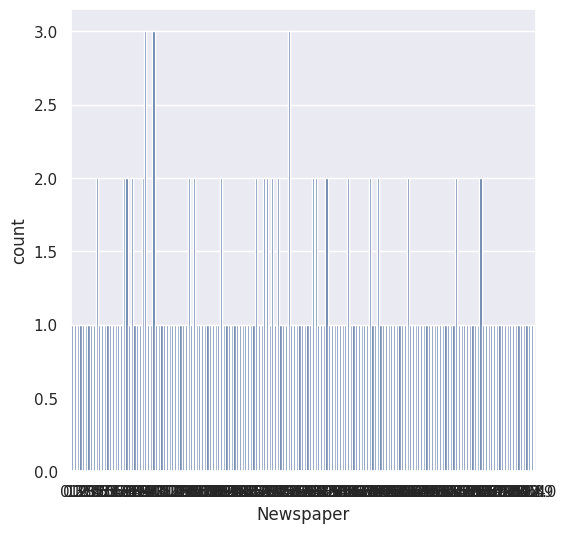

In [30]:
#Newspaper
plt.figure(figsize=(6,6))
sns.countplot(x='Newspaper',data=advertising_data)
plt.show()

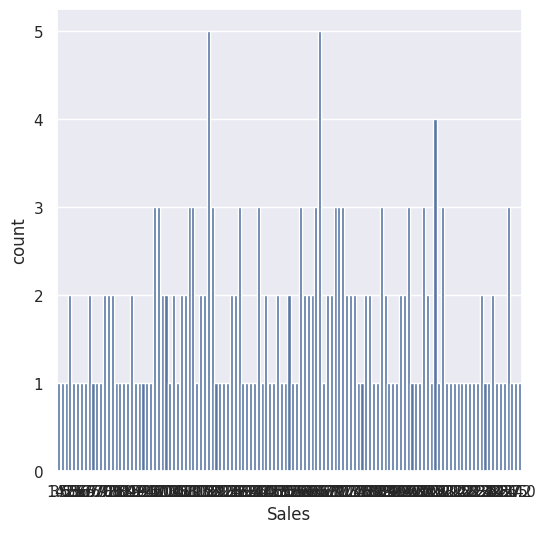

In [29]:
#Sales
plt.figure(figsize=(6,6))
sns.countplot(x='Sales',data=advertising_data)
plt.show()

Data pre processing

In [31]:
advertising_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Splitting features and target

In [35]:
x=advertising_data.drop(columns='Sales',axis=1)
y=advertising_data['Sales']

In [36]:
print(x)

      TV  Radio  Newspaper
0    153   37.8       69.2
1     32   39.3       45.1
2     12   45.9       69.3
3     98   41.3       58.5
4    112   10.8       58.4
..   ...    ...        ...
195   28    3.7       13.8
196   63    4.9        8.1
197  111    9.3        6.4
198  181   42.0       66.2
199  154    8.6        8.7

[200 rows x 3 columns]


In [37]:
print(y)

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


Splitting the data into Training data and testing data

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [39]:
print(x.shape,x_train.shape,x_test.shape)

(200, 3) (160, 3) (40, 3)


Machine learning model training
XGBoost Regressor

In [43]:
regressor=XGBRegressor()

In [45]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [46]:
#Training data prediction
training_data_prediction=regressor.predict(x_train)

In [47]:
#r squared value
r2_train=metrics.r2_score(y_train,training_data_prediction)

In [49]:
print('R squared value=',r2_train)

R squared value= 0.9999998984422815


In [50]:
#Testing data prediction
testing_data_prediction=regressor.predict(x_test)

In [51]:
#r squared value
r2_test=metrics.r2_score(y_test,testing_data_prediction)

In [52]:
print('R squared value=',r2_test)

R squared value= 0.9280011740911406
